**Summary of the experiment:** This experiment covers how to do data analysis with python using a Netflix customer database. The first steps include importing the required libraries pandas, seaborn, matplotlib, and matplotlib.pyplot. Then, the data is read from a CSV file and displayed using the df.head() method. The data is checked for duplicates and missing values using the df.duplicated().sum() and df.isnull().sum() methods, respectively. Bar charts are created to show the number of users per country, gender, device type, and subscription type. A map is created to show the user distribution by country. The join date is converted to datetime format and the customer duration is calculated. Finally, the data is pivoted to show the subscription type by country.

In [2]:
import pandas as pd
import numpy as np

# Read the data
df = pd.read_csv('/content/Netflix Userbase.csv')
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [3]:
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [4]:
Country_counts=df['Country'].value_counts()
Country_counts

,count
Country,
United States,451
Spain,451
Canada,317
United Kingdom,183
Australia,183
Germany,183
France,183
Brazil,183
Mexico,183


In [5]:
Country_unique=df['Country'].unique()
print(Country_unique)

['United States' 'Canada' 'United Kingdom' 'Australia' 'Germany' 'France'
 'Brazil' 'Mexico' 'Spain' 'Italy']


In [6]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

,0
User ID,0
Subscription Type,0
Monthly Revenue,0
Join Date,0
Last Payment Date,0
Country,0
Age,0
Gender,0
Device,0
Plan Duration,0


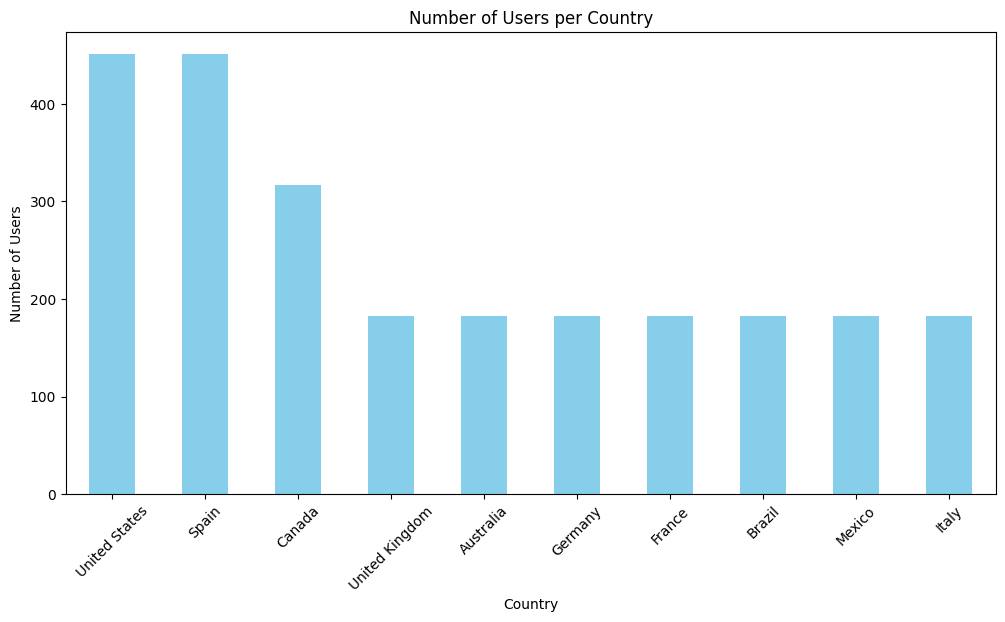

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
df['Country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Users per Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

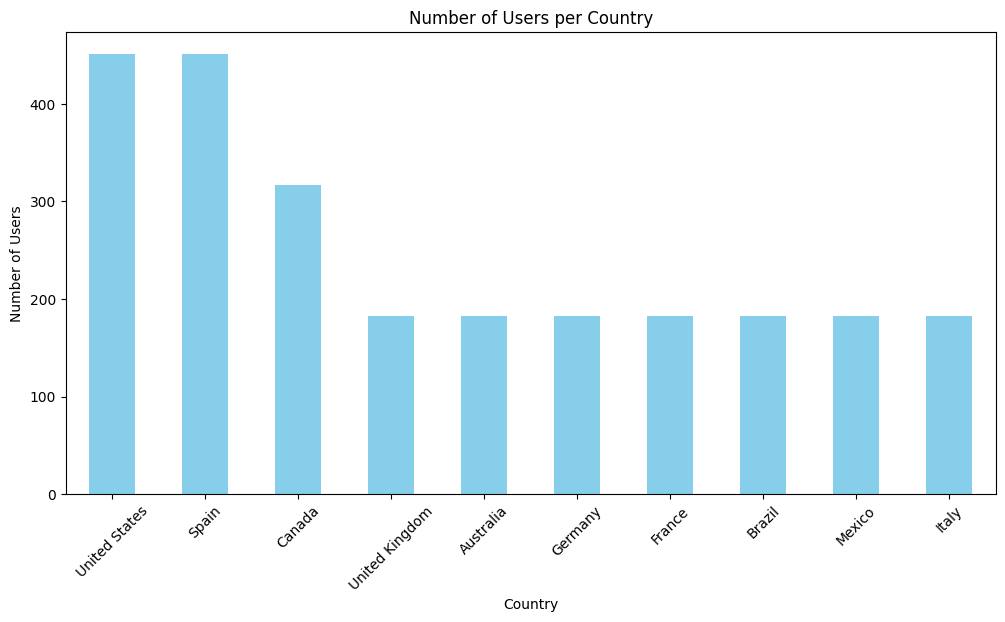

In [10]:
plt.figure(figsize=(12, 6))
df['Country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Users per Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

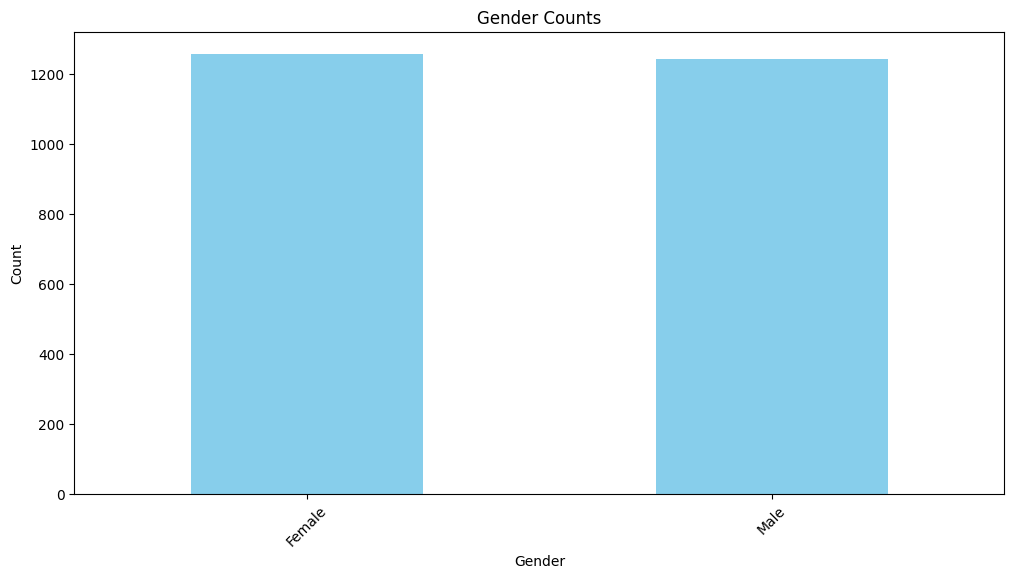

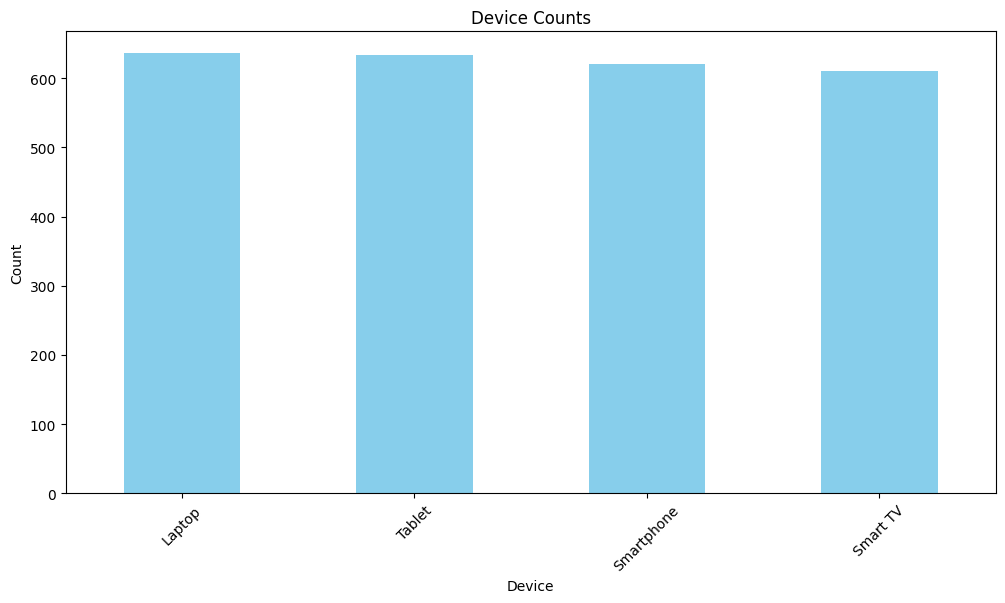

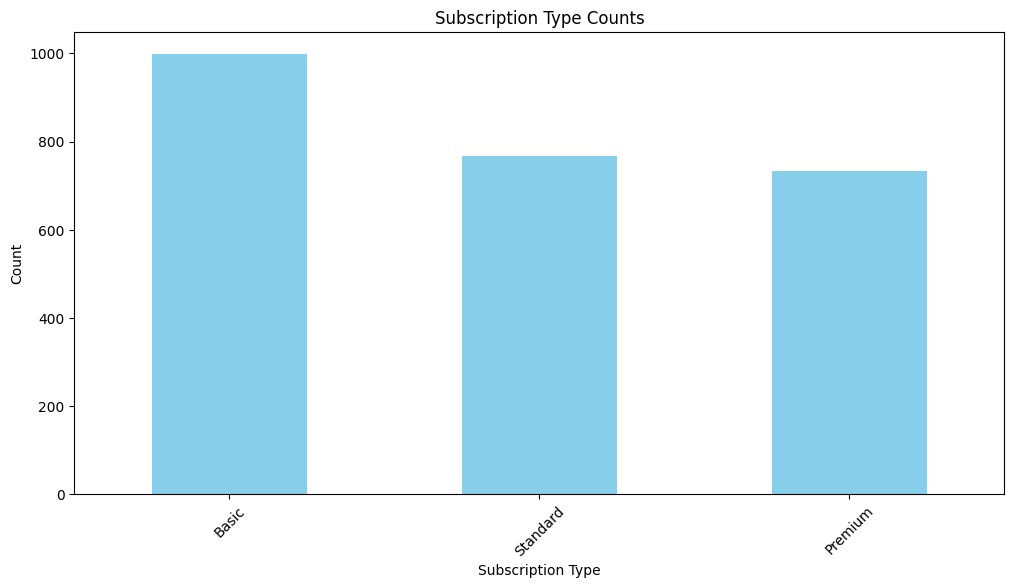

In [11]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
columns_titles = {
    "Gender": "Gender Counts",
    "Device": "Device Counts",
    "Subscription Type": "Subscription Type Counts"
}

for column, title in columns_titles.items():
    plt.figure(figsize=(12, 6))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [12]:
import plotly.express as px

# Assuming df is your DataFrame
user_counts_by_country = df['Country'].value_counts().reset_index()
user_counts_by_country.columns = ['Country', 'User Count']

fig = px.choropleth(user_counts_by_country, locations='Country', locationmode='country names',
                    color='User Count', hover_name='Country', title='User Distribution by Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

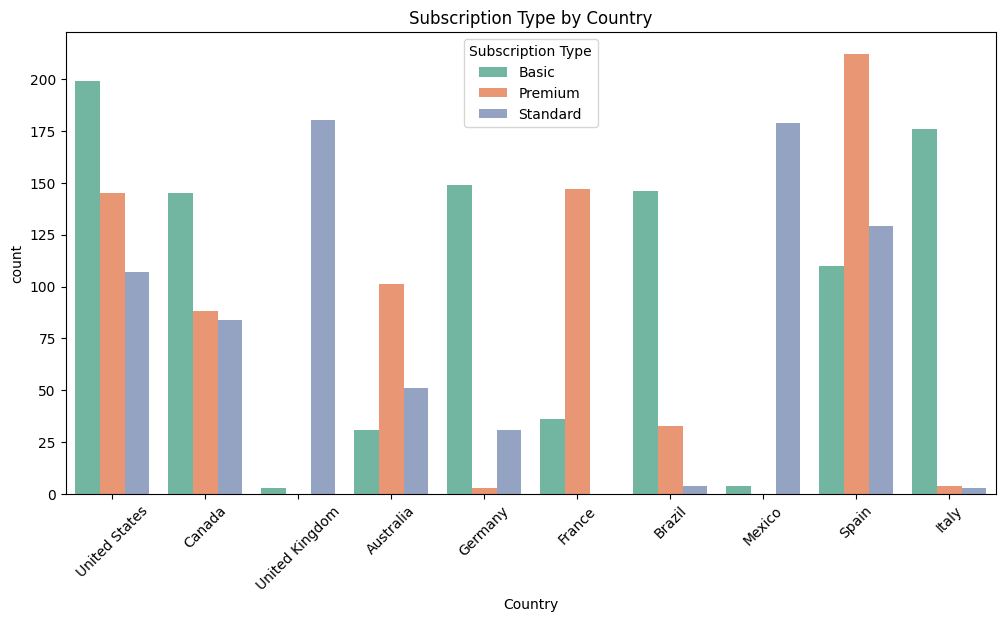

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', hue='Subscription Type', data=df, palette='Set2')
plt.title('Subscription Type by Country')
plt.xticks(rotation=45)
plt.show()

In [15]:
subs_by_country = df.pivot_table(
    index='Country',
    columns='Subscription Type',
    values='User ID',
    aggfunc='count',
    fill_value=0
)

subs_by_country

Subscription Type,Basic,Premium,Standard
Country,,,
Australia,31,101,51
Brazil,146,33,4
Canada,145,88,84
France,36,147,0
Germany,149,3,31
Italy,176,4,3
Mexico,4,0,179
Spain,110,212,129
United Kingdom,3,0,180


In [16]:
subs_by_country['total']= subs_by_country.sum(axis=1)
subs_by_country

Subscription Type,Basic,Premium,Standard,total
Country,,,,
Australia,31,101,51,183
Brazil,146,33,4,183
Canada,145,88,84,317
France,36,147,0,183
Germany,149,3,31,183
Italy,176,4,3,183
Mexico,4,0,179,183
Spain,110,212,129,451
United Kingdom,3,0,180,183


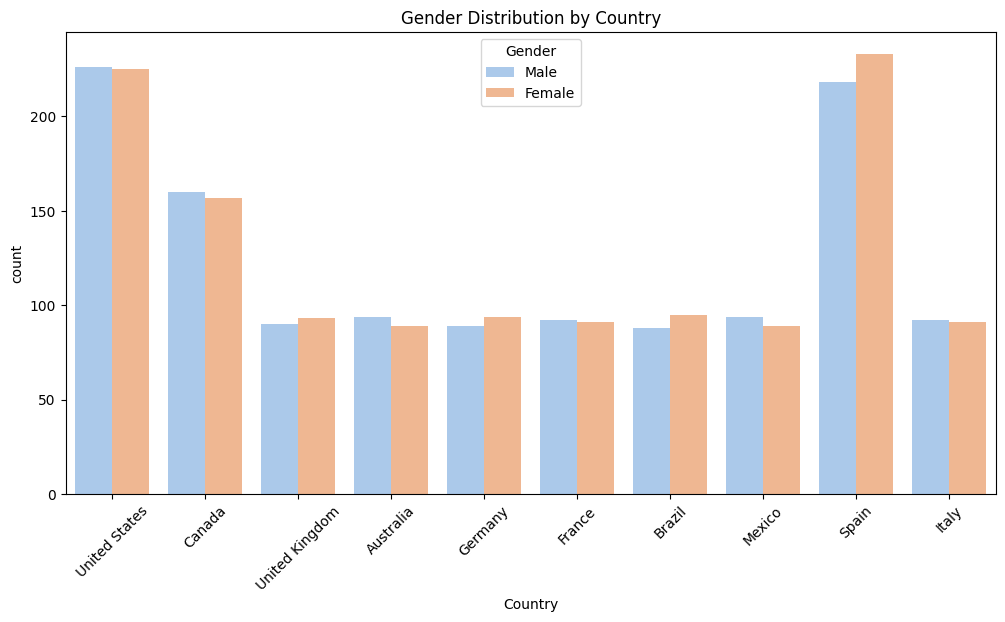

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.countplot(x='Country', hue='Gender', data=df, palette='pastel')
plt.title('Gender Distribution by Country')
plt.xticks(rotation=45)
plt.show()

In [19]:
gender_by_country = df.pivot_table(
    index='Country',
    columns='Gender',
    values='User ID',
    aggfunc='count',
    fill_value=0
)

gender_by_country

Gender,Female,Male
Country,,
Australia,89,94
Brazil,95,88
Canada,157,160
France,91,92
Germany,94,89
Italy,91,92
Mexico,89,94
Spain,233,218
United Kingdom,93,90


In [21]:
subs_by_country_gender = df.pivot_table(
    index='Country',
    columns=['Subscription Type', 'Gender'],
    values='User ID',
    aggfunc='count',
    fill_value=0
)

subs_by_country_gender

Subscription Type  Basic      Premium      Standard     
Gender            Female Male  Female Male   Female Male
Country                                                 
Australia             16   15      45   56       28   23
Brazil                78   68      16   17        1    3
Canada                68   77      40   48       49   35
France                17   19      74   73        0    0
Germany               80   69       1    2       13   18
Italy                 86   90       3    1        2    1
Mexico                 2    2       0    0       87   92
Spain                 60   50     113   99       60   69
United Kingdom         2    1       0    0       91   89
United States        103   96      72   73       50   57

In [23]:
subs_by_country_gender2 = df.pivot_table(
    index=['Country', 'Gender'],
    columns='Subscription Type',
    values='User ID',
    aggfunc='count',
    fill_value=0
)

subs_by_country_gender2

Subscription Type      Basic  Premium  Standard
Country        Gender                          
Australia      Female     16       45        28
               Male       15       56        23
Brazil         Female     78       16         1
               Male       68       17         3
Canada         Female     68       40        49
               Male       77       48        35
France         Female     17       74         0
               Male       19       73         0
Germany        Female     80        1        13
               Male       69        2        18
Italy          Female     86        3         2
               Male       90        1         1
Mexico         Female      2        0        87
               Male        2        0        92
Spain          Female     60      113        60
               Male       50       99        69
United Kingdom Female      2        0        91
               Male        1        0        89
United States  Female    103       72        50
               Male       96       73        57

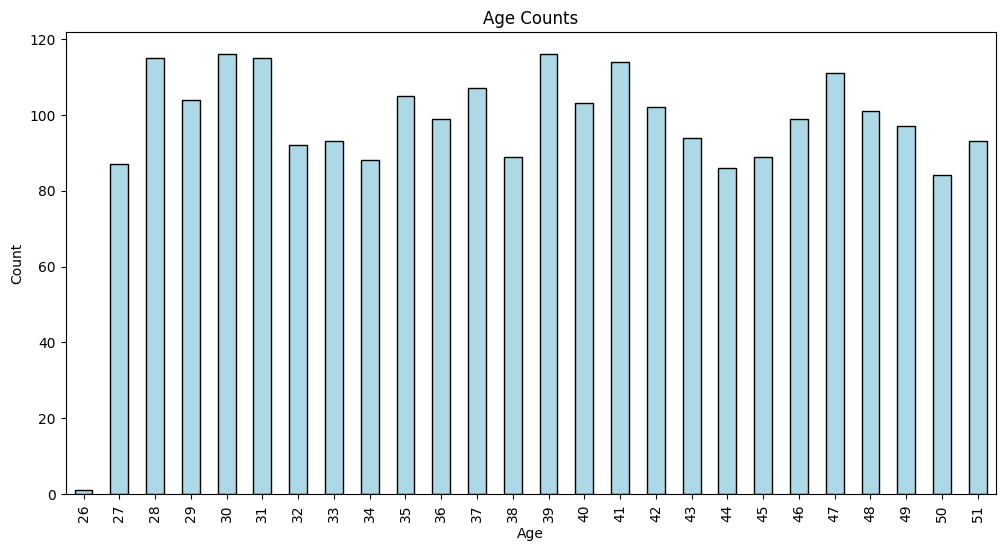

In [24]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
df['Age'].value_counts().sort_index().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Age Counts')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [25]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [31]:
# Assuming df is your DataFrame
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d-%m-%y')
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month


In [32]:
df['Duration'] = (df['Last Payment Date'] - df['Join Date']).dt.days
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month,352
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month,344
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month,340
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month,334


In [33]:
import math

df['Duration Months'] = df['Duration'].apply(lambda x: math.ceil(x / 30))
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration Months
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,18
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,22
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,12
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month,352,12
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month,344,12
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month,340,12
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month,334,12


In [34]:
average_duration = df['Duration Months'].mean()
average_duration

10.7808

In [35]:
#life time value
df['LTV']=df['Duration Months']*df['Monthly Revenue']
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration Months,LTV
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,18,180
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,22,330
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4,48
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,12,144
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month,352,12,168
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month,344,12,180
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month,340,12,144
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month,334,12,156


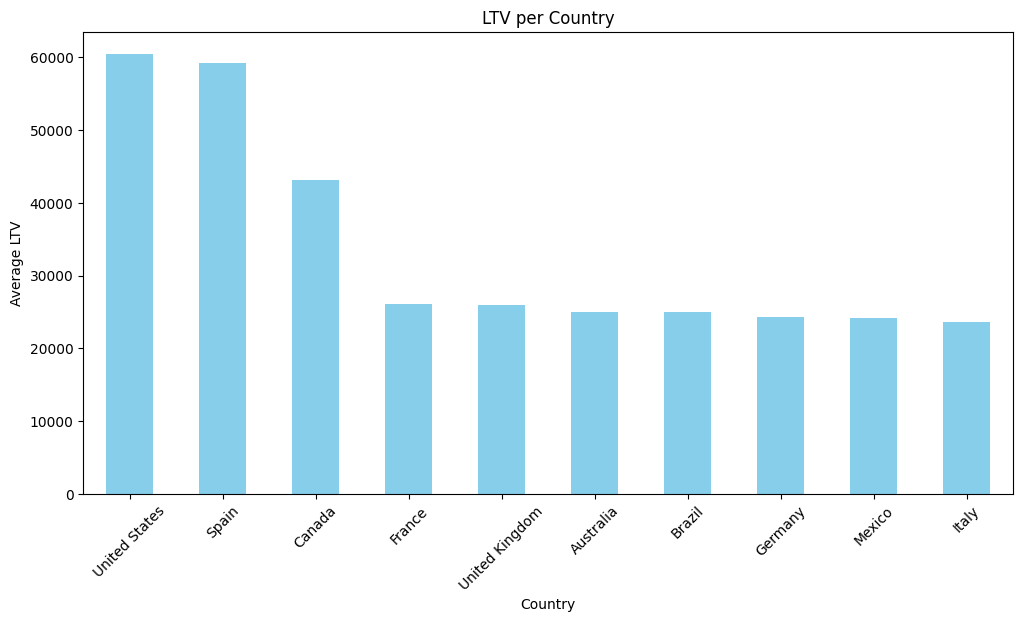

In [36]:
import matplotlib.pyplot as plt

ltv_per_country_sum = df.groupby("Country")['LTV'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ltv_per_country_sum.plot(kind='bar', color="skyblue")

plt.title('LTV per Country')
plt.xlabel('Country')
plt.ylabel('Average LTV')
plt.xticks(rotation=45)

plt.show()

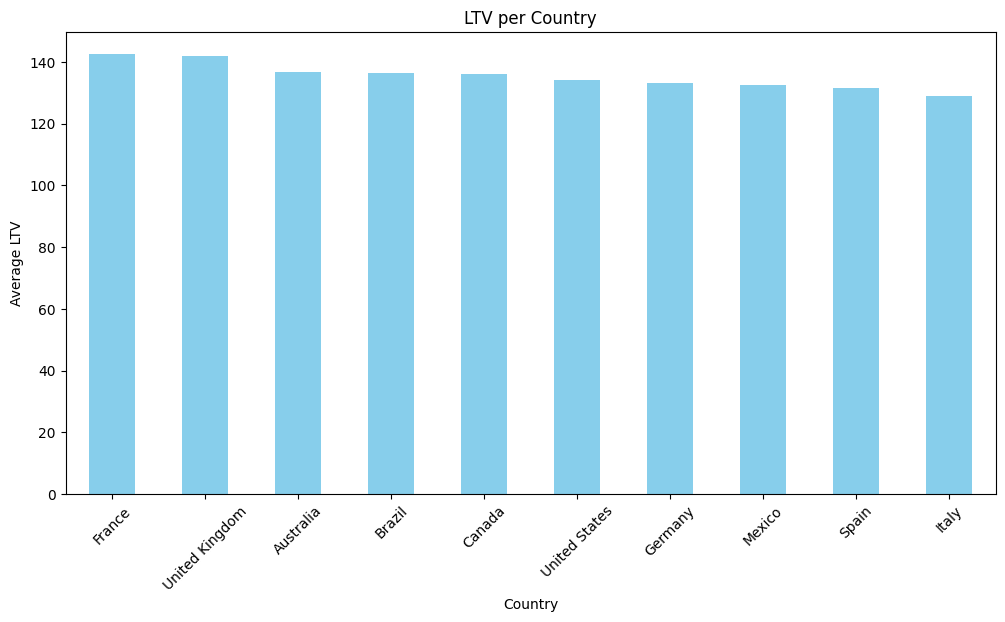

In [37]:
import matplotlib.pyplot as plt

ltv_per_country_sum = df.groupby("Country")['LTV'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ltv_per_country_sum.plot(kind='bar', color="skyblue")

plt.title('LTV per Country')
plt.xlabel('Country')
plt.ylabel('Average LTV')
plt.xticks(rotation=45)

plt.show()

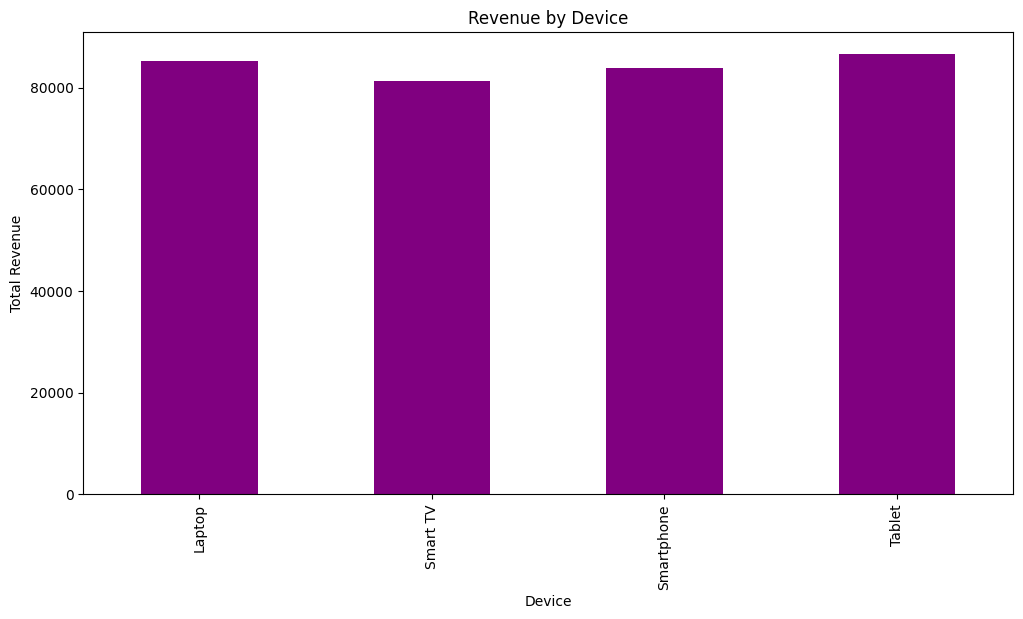

In [38]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
revenue_by_device = df.groupby("Device")["LTV"].sum()

plt.figure(figsize=(12, 6))
revenue_by_device.plot(kind='bar', color="purple")

plt.title('Revenue by Device')
plt.xlabel('Device')
plt.ylabel('Total Revenue')

plt.show()

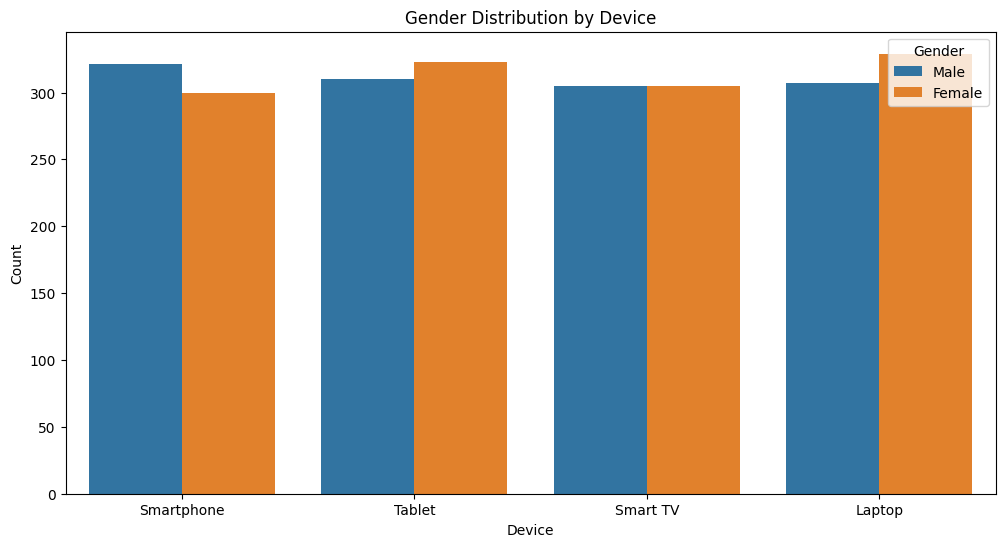

In [39]:

plt.figure(figsize=(12, 6))
sns.countplot(x='Device', hue='Gender', data=df)

plt.title("Gender Distribution by Device")
plt.xlabel('Device')
plt.ylabel('Count')

plt.show()